In [ ]:
!pip install numpy pandas matplotlib pillow

In [1]:
import pandas as pd

data = pd.DataFrame({
    'A': range(10),
    'B': pd.Series([x**2 for x in range(10)]),
    'C': pd.Series([2**x for x in range(10)])
})
csv_path = 'example_data.csv'
data.to_csv(csv_path, index=False)
csv_path

'example_data.csv'

In [2]:
from PIL import Image
import numpy as np

# Crear una imagen de ejemplo y guardarla como PNG
image_array = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)
image = Image.fromarray(image_array, 'RGB')
png_path = 'example_image.png'
image.save(png_path)
png_path

'example_image.png'

In [3]:
# Actualizar el contenido del archivo de texto con un cuento corto en español
text_content_es = """
Érase una vez en un tranquilo pueblo, vivía un pequeño gato llamado Bigotes. Bigotes no era un gato cualquiera;
tenía un agudo sentido de la aventura y siempre estaba curioso por conocer el mundo más allá de su hogar.

Un día, Bigotes decidió explorar el bosque que yacía al borde del pueblo. Mientras deambulaba más adentro en el bosque,
descubrió un sendero oculto que llevaba a un jardín secreto. El jardín estaba lleno de flores coloridas y mariposas,
y en el centro, un estanque de agua cristalina brillaba bajo la luz del sol.

Bigotes pasó todo el día explorando este lugar mágico, haciendo amigos entre los animales del bosque y disfrutando de la belleza de la naturaleza.
Al caer el sol, regresó a casa, su corazón lleno de alegría y historias para contar.

Y desde ese día, el valiente gatito fue conocido como Bigotes el Explorador, guardián del jardín secreto,
y narrador de cuentos encantadores.
"""

# Sobreescribir el archivo de texto anterior con el nuevo contenido en español
txt_path_es = 'example_text_es.txt'
with open(txt_path_es, 'w') as file:
    file.write(text_content_es.strip())

# Retornar la ruta del archivo actualizado
txt_path_es

'example_text_es.txt'

In [4]:
data.tail()

,A,B,C
5,5,25,32
6,6,36,64
7,7,49,128
8,8,64,256
9,9,81,512


In [8]:
data.describe()

,A,B,C
count,10.00000,10.000000,10.00000
mean,4.50000,28.500000,102.30000
std,3.02765,28.304888,164.94851
min,0.00000,0.000000,1.00000
25%,2.25000,5.250000,5.00000
50%,4.50000,20.500000,24.00000
75%,6.75000,45.750000,112.00000
max,9.00000,81.000000,512.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10 non-null     int64
 1   B       10 non-null     int64
 2   C       10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


In [ ]:
data.isnull().sum()

,0
A,0
B,0
C,0


In [5]:
data.fillna(data.mean(), inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
colum_scaled = scaler.fit_transform(data[['A']])

In [7]:
data_scaled = data.copy()
data_scaled['A'] = colum_scaled
data_scaled.describe()

,A,B,C
count,1.000000e+01,10.000000,10.00000
mean,-6.661338e-17,28.500000,102.30000
std,1.054093e+00,28.304888,164.94851
min,-1.566699e+00,0.000000,1.00000
25%,-7.833495e-01,5.250000,5.00000
50%,0.000000e+00,20.500000,24.00000
75%,7.833495e-01,45.750000,112.00000
max,1.566699e+00,81.000000,512.00000


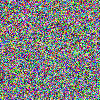

In [9]:
from PIL import Image
from IPython.display import display
image = Image.open('/content/example_image.png')
display(image)

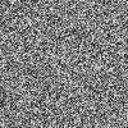

In [13]:
image_gray = image.convert('L')
image_resized = image_gray.resize((128, 128))
display(image_resized)

In [ ]:
import string
text = text_content_es.lower().translate(str.maketrans('', '', string.punctuation))
print(text)


érase una vez en un tranquilo pueblo vivía un pequeño gato llamado bigotes bigotes no era un gato cualquiera 
tenía un agudo sentido de la aventura y siempre estaba curioso por conocer el mundo más allá de su hogar

un día bigotes decidió explorar el bosque que yacía al borde del pueblo mientras deambulaba más adentro en el bosque 
descubrió un sendero oculto que llevaba a un jardín secreto el jardín estaba lleno de flores coloridas y mariposas 
y en el centro un estanque de agua cristalina brillaba bajo la luz del sol

bigotes pasó todo el día explorando este lugar mágico haciendo amigos entre los animales del bosque y disfrutando de la belleza de la naturaleza 
al caer el sol regresó a casa su corazón lleno de alegría y historias para contar

y desde ese día el valiente gatito fue conocido como bigotes el explorador guardián del jardín secreto 
y narrador de cuentos encantadores



In [15]:
import pandas as pd
from PIL import Image
import os
import string

def preprocessing_function(filepath):
    """
    Función para preprocesar archivos dependiendo de su tipo.

    Args:
    filepath (str): Ruta al archivo que se va a procesar.

    Returns:
    DataFrame, Image, or str: Retorna un DataFrame para archivos CSV, una imagen procesada para archivos de imagen,
    un texto limpio para archivos de texto, o una cadena indicando que el tipo de archivo no es soportado.
    """

    # Determinar el tipo de archivo basado en la extensión
    _, file_extension = os.path.splitext(filepath)
    file_extension = file_extension.lower()

    # Procesamiento para archivos CSV
    if file_extension in ['.csv']:
        # Leer el archivo CSV
        data = pd.read_csv(filepath)
        # Limpiar valores nulos, rellenando con el valor anterior
        data.fillna(method='ffill', inplace=True)
        # Intentar convertir todas las columnas a tipo numérico, ignorar errores para mantener datos no numéricos
        data = data.apply(pd.to_numeric, errors='ignore')
        return data

    # Procesamiento para imágenes
    elif file_extension in ['.jpg', '.jpeg', '.png']:
        # Abrir la imagen
        image = Image.open(filepath)
        # Convertir a escala de grises y redimensionar a 128x128 para normalización
        image = image.convert('L')
        image = image.resize((128, 128))
        return image

    # Procesamiento para archivos de texto
    elif file_extension in ['.txt']:
        # Leer el archivo de texto
        with open(filepath, 'r', encoding='utf-8') as file:
            text = file.read()
        # Limpieza básica: convertir a minúsculas y eliminar signos de puntuación
        text = text.lower().translate(str.maketrans('', '', string.punctuation))
        return text

    else:
        # Manejo de tipos de archivos no soportados
        return "Unsupported file type"

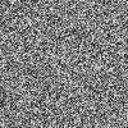

In [18]:
result = preprocessing_function(png_path)
result